In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
def normal_gauss(x, m, r):
    return np.exp(-0.5 * ((x - m) / r) ** 2) / (np.sqrt(2 * np.pi) * r)

In [16]:
def create_sample(xor = False, size = 200, sdv = 0.4):
    x1cla1c1 = np.random.normal(loc = 2, scale = 0.8, size = size).reshape(-1, 1)
    x2cla1c1 = np.random.normal(loc = 2, scale = 0.8, size = size).reshape(-1, 1)
    
    x1cla1c2 = np.random.normal(loc = 4, scale = sdv, size = size).reshape(-1, 1)
    x2cla1c2 = np.random.normal(loc = 4, scale = sdv, size = size).reshape(-1, 1)
    
    if xor == True:
        x1cla2c1 = np.random.normal(loc = 4, scale = sdv, size = size).reshape(-1, 1)
        x2cla2c1 = np.random.normal(loc = 2, scale = sdv, size = size).reshape(-1, 1)
        
        x1cla2c2 = np.random.normal(loc = 2, scale = sdv, size = size).reshape(-1, 1)
        x2cla2c2 = np.random.normal(loc = 4, scale = sdv, size = size).reshape(-1, 1)

        cla1c1 = np.concatenate((x1cla1c1, x2cla1c1), axis = 1)
        cla1c2 = np.concatenate((x1cla1c2, x2cla1c2), axis = 1)
        cla1 = np.concatenate((cla1c1, cla1c2), axis = 0)
        ones = np.ones(cla1.shape[0]).reshape(-1, 1)
        cla1 = np.concatenate((cla1, ones), axis = 1)

        cla2c1 = np.concatenate((x1cla2c1, x2cla2c1), axis = 1)
        cla2c2 = np.concatenate((x1cla2c2, x2cla2c2), axis = 1)
        cla2 = np.concatenate((cla2c1, cla2c2), axis = 0)
        ones_neg = -1*np.ones(cla2.shape[0]).reshape(-1, 1)
        cla2 = np.concatenate((cla2, ones_neg), axis = 1)
        
        return np.concatenate((cla1, cla2), axis = 0)
    else: 
        cla1 = np.concatenate((x1cla1c1, x2cla1c1), axis = 1)
        ones = np.ones(cla1.shape[0]).reshape(-1, 1)
        cla1 = np.concatenate((cla1, ones), axis = 1)
        
        cla2 = np.concatenate((x1cla1c2, x2cla1c2), axis = 1)
        ones_neg = -1*np.ones(cla2.shape[0]).reshape(-1, 1)
        cla2 = np.concatenate((cla2, ones_neg), axis = 1)
        
        return np.concatenate((cla1, cla2), axis = 0)

### Part 1:

In [17]:
data_ex1 = create_sample(xor = False, size = 50, sdv = 0.3)

data1_ex1 = data_ex1[data_ex1[:, 2] == 1]
data2_ex1 = data_ex1[data_ex1[:, 2] == -1]

In [18]:
# Calculating the mean and standard deviation of each sample :

m11 = np.mean(data1_ex1[:, 0])
m12 = np.mean(data1_ex1[:, 1])
m21 = np.mean(data2_ex1[:, 0])
m22 = np.mean(data2_ex1[:, 1])

s11 = np.std(data1_ex1[:, 0])
s12 = np.std(data1_ex1[:, 1])
s21 = np.std(data2_ex1[:, 0])
s22 = np.std(data2_ex1[:, 1])

In [19]:
xrange = np.linspace(start = 0, stop = 6, num = 60)

f11 = normal_gauss(xrange, m11, s11).reshape(-1, 1)
f12 = normal_gauss(xrange, m12, s12).reshape(-1, 1)
f21 = normal_gauss(xrange, m21, s21).reshape(-1, 1)
f22 = normal_gauss(xrange, m22, s22).reshape(-1, 1)

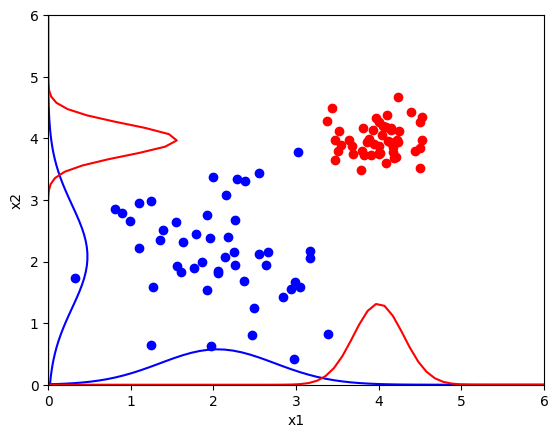

In [20]:
plt.scatter(data1_ex1[:, 0], data1_ex1[:, 1], color = "blue")
plt.plot(xrange, f11, color = "blue")
plt.plot(f12, xrange, color = "blue")
plt.scatter(data2_ex1[:, 0], data2_ex1[:, 1], color = "red")
plt.plot(xrange, f21, color = "red")
plt.plot(f22, xrange, color = "red")
plt.xlim(0, 6)
plt.ylim(0, 6)
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [21]:
X_1 = data_ex1[:, : -1]
y_1 = data_ex1[:, -1]

In [27]:
def pdfnvar(x: np.ndarray, m: np.ndarray, K: np.ndarray, n: int):
    diff = x - m
    det_K = np.linalg.det(K)
    
    # Use pseudo-inverse if K is singular
    if det_K == 0:
        inv_K = np.linalg.pinv(K)
    else:
        inv_K = np.linalg.inv(K)
    
    exponent = -0.5 * (diff.T @ inv_K @ diff)
    denominator = np.sqrt((2 * np.pi) ** n * det_K)
    
    return (1 / denominator) * np.exp(exponent)

In [28]:
def bayes(X_train, y_train, X_test):
    # Concatenate features and labels
    data = np.column_stack((X_train, y_train))
    label, count = np.unique(y_train, return_counts=True)

    # Separate the data for each class
    Xc1 = data[data[:, -1] == 1][:, :-1]
    mc1 = np.mean(Xc1, axis=0)
    cov1 = np.cov(Xc1, rowvar=False)
    
    Xc2 = data[data[:, -1] == -1][:, :-1]
    mc2 = np.mean(Xc2, axis=0)
    cov2 = np.cov(Xc2, rowvar=False)

    # Calculate prior probabilities
    Pc1 = count[0] / (count[0] + count[1])
    Pc2 = count[1] / (count[0] + count[1])

    rest = []
    for i in X_test:
        Vers1 = pdfnvar(x = i, m = mc1, K = cov1, n = X_train.shape[1])
        Vers2 = pdfnvar(x = i, m = mc2, K = cov2, n = X_train.shape[1])
        C1 = Pc1 * Vers1
        C2 = Pc2 * Vers2
        if C1 >= C2:
            rest.append(1)  # Class 1
        else:
            rest.append(-1)  # Class 0
    return np.array(rest)

In [29]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

def k_fold_cv(data, label, k, Min = True):
    # Taking how much data we'll have in each fold.
    Na = data.shape[0] // k
    idx = np.random.permutation(data.shape[0])
    
    # Use .iloc for pandas DataFrame indexing
    data = data.iloc[idx]
    label = label.iloc[idx]  # Adjust label indexing if it's a pandas Series
    a = 1
    # Using the scaler
    if Min == True:
        scaler = MinMaxScaler()
        data = scaler.fit_transform(data)
    elif Min == False and a != 1:
        scaler = StandardScaler()
        data = scaler.fit_transform(data)
    elif Min == False and a == 1:
        data = np.array(data)
        
    cv_r = []
    for i in range(k):
        # Taking the index of each sample.
        test_idx = np.arange(start=(i * Na), stop=(i + 1) * Na, step = 1)
        train_idx = np.setdiff1d(np.arange(data.shape[0]), test_idx)
        
        # Separating data train and data test.
        X_test = data[test_idx, :]
        X_train = data[train_idx, :]
        y_test = label[test_idx]
        y_train = label[train_idx]

        # Predicting with Bayes classifier
        y_pred = bayes(X_train = X_train, y_train = y_train, X_test = X_test)

        # Calculate accuracy
        cv_r.append(np.mean(np.array(y_pred) == y_test))  # Accuracy. You can change the metric here.
    return np.mean(cv_r)  # The final accuracy is the mean.

[[1.24862076 0.88398695]
 [0.88398695 1.29612795]]


[]

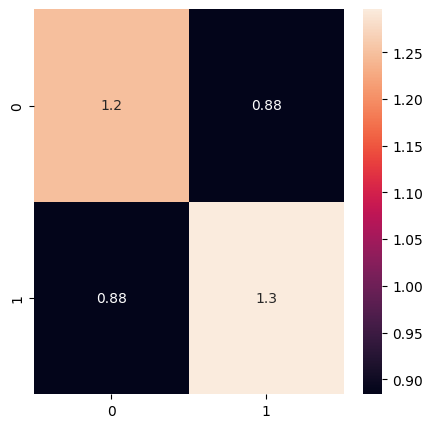

In [30]:
import seaborn as sns
cov_matrix_ex1 = np.cov(X_1, rowvar=False)
print(cov_matrix_ex1)
plt.figure(figsize = (5, 5))
sns.heatmap(data = cov_matrix_ex1, annot = True)
plt.plot()

In [31]:
a_1 = k_fold_cv(data = pd.DataFrame(X_1), label = pd.Series(y_1), k = 10, Min = True)

In [32]:
print(f"The mean acc is {a_1*100}%")

The mean acc is 70.0%


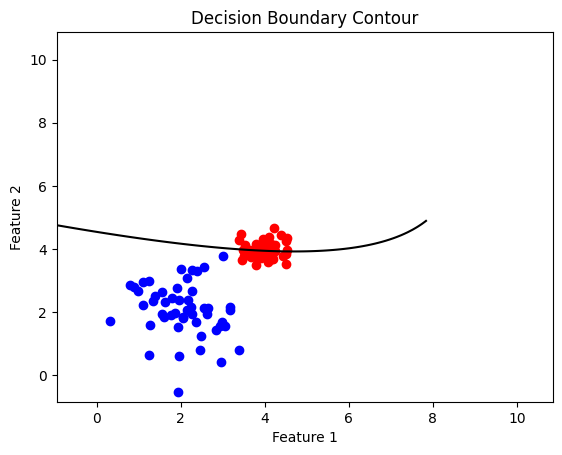

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

def plot_separation_surface(X_train, y_train):
    # Combine features and labels
    data = np.column_stack((X_train, y_train))

    # Separate data based on class labels
    Xc1 = data[data[:, -1] == 1][:, :-1]
    mc1 = np.mean(Xc1, axis=0)
    cov1 = np.cov(Xc1, rowvar=False)
    
    Xc2 = data[data[:, -1] == -1][:, :-1]
    mc2 = np.mean(Xc2, axis=0)
    cov2 = np.cov(Xc2, rowvar=False)
    
    # Generate grid points for plotting
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    seqi, seqj = np.meshgrid(np.linspace(x_min, x_max - 3, 100), 
                             np.linspace(y_min, y_max - 3, 100))
    grid_points = np.column_stack((seqi.ravel(), seqj.ravel()))

    # Calculate PDFs using scipy.stats.multivariate_normal
    pdf1 = multivariate_normal.pdf(grid_points, mean=mc1, cov=cov1)
    pdf2 = multivariate_normal.pdf(grid_points, mean=mc2, cov=cov2)

    # Compute decision boundary
    boundary = (pdf1 - pdf2).reshape(seqi.shape)

    # Plot decision boundary
    plt.contour(seqi, seqj, boundary, levels=[0], colors="black")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Decision Boundary Contour")
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

# Example usage
np.random.seed(42)
X_train = np.random.rand(100, 2) * 10  # Random 2D features
y_train = np.random.choice([1, -1], size=100)  # Random binary labels

plot_separation_surface(X_train, y_train)
plt.scatter(data1_ex1[:, 0], data1_ex1[:, 1], color = "blue")
plt.scatter(data2_ex1[:, 0], data2_ex1[:, 1], color = "red")
plt.show()


In [61]:
"""def plot_separation_surface(X_train, y_train):
    data = np.column_stack((X_train, y_train))

    Xc1 = data[data[:, -1] == 1][:, :-1]
    mc1 = np.mean(Xc1, axis=0)
    cov1 = np.cov(Xc1, rowvar=False)
    
    Xc2 = data[data[:, -1] == -1][:, :-1]
    mc2 = np.mean(Xc2, axis=0)
    cov2 = np.cov(Xc2, rowvar=False)
    
    # Generate grid points for plotting
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    seqi, seqj = np.meshgrid(np.linspace(x_min, x_max, 100), 
                             np.linspace(y_min, y_max, 100))
    grid_points = np.column_stack((seqi.ravel(), seqj.ravel()))
    #raise Exception(f" grid dim {grid_points.shape}")
    pdf1 = pdfnvar(x = grid_points, m = mc1, K = cov1, n = 2)
    pdf2 = pdfnvar(x = grid_points, m = mc2, K = cov2, n = 2)

    boundary = (pdf1 - pdf2).reshape(seqi.shape)

    plt.contour(seqi, seqj, boundary, levels = [0], colors = "red")
    plt.xlabel("seqi")
    plt.ylabel("seqj")
    plt.title("Contour Plot")
    plt.xlim(0, 6)
    plt.ylabel(0, 6)
    plt.show()
plot_separation_surface(X_train = X_1, y_train = y_1)"""

'def plot_separation_surface(X_train, y_train):\n    data = np.column_stack((X_train, y_train))\n\n    Xc1 = data[data[:, -1] == 1][:, :-1]\n    mc1 = np.mean(Xc1, axis=0)\n    cov1 = np.cov(Xc1, rowvar=False)\n    \n    Xc2 = data[data[:, -1] == -1][:, :-1]\n    mc2 = np.mean(Xc2, axis=0)\n    cov2 = np.cov(Xc2, rowvar=False)\n    \n    # Generate grid points for plotting\n    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1\n    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1\n    seqi, seqj = np.meshgrid(np.linspace(x_min, x_max, 100), \n                             np.linspace(y_min, y_max, 100))\n    grid_points = np.column_stack((seqi.ravel(), seqj.ravel()))\n    #raise Exception(f" grid dim {grid_points.shape}")\n    pdf1 = pdfnvar(x = grid_points, m = mc1, K = cov1, n = 2)\n    pdf2 = pdfnvar(x = grid_points, m = mc2, K = cov2, n = 2)\n\n    boundary = (pdf1 - pdf2).reshape(seqi.shape)\n\n    plt.contour(seqi, seqj, boundary, levels = [0], colors 

### Part 2:

In [49]:
data_ex2 = create_sample(xor = True, size = 50, sdv = 0.3)

data1_ex2 = data_ex2[data_ex2[:, 2] == 1]
data2_ex2 = data_ex2[data_ex2[:, 2] == -1]

In [50]:
# Calculating the mean and standard deviation of each sample :

m11 = np.mean(data1_ex2[:, 0])
m12 = np.mean(data1_ex2[:, 1])
m21 = np.mean(data2_ex2[:, 0])
m22 = np.mean(data2_ex2[:, 1])

s11 = np.std(data1_ex2[:, 0])
s12 = np.std(data1_ex2[:, 1])
s21 = np.std(data2_ex2[:, 0])
s22 = np.std(data2_ex2[:, 1])

In [51]:
xrange = np.linspace(start = 0, stop = 6, num = 60)

f11 = normal_gauss(xrange, m11, s11).reshape(-1, 1)
f12 = normal_gauss(xrange, m12, s12).reshape(-1, 1)
f21 = normal_gauss(xrange, m21, s21).reshape(-1, 1)
f22 = normal_gauss(xrange, m22, s22).reshape(-1, 1)

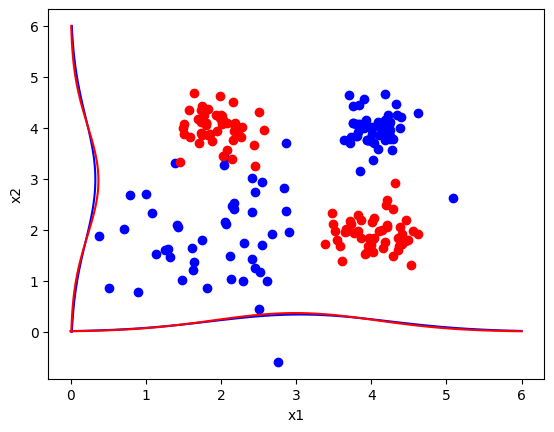

In [52]:
plt.scatter(data1_ex2[:, 0], data1_ex2[:, 1], color = "blue")
plt.plot(xrange, f11, color = "blue")
plt.plot(f12, xrange, color = "blue")
plt.scatter(data2_ex2[:, 0], data2_ex2[:, 1], color = "red")
plt.plot(xrange, f21, color = "red")
plt.plot(f22, xrange, color = "red")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [53]:
X_2 = data_ex2[:, : -1]
y_2 = data_ex2[:, -1]

[[1.30090849 0.01394229]
 [0.01394229 1.32979793]]


[]

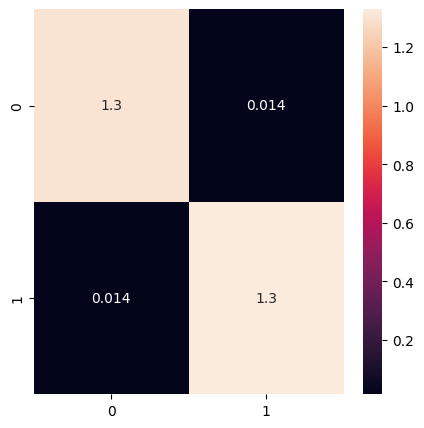

In [55]:
cov_matrix_ex2 = np.cov(X_2, rowvar=False)
print(cov_matrix_ex2)
plt.figure(figsize = (5, 5))
sns.heatmap(data = cov_matrix_ex2, annot = True)
plt.plot()

In [56]:
a_2 = k_fold_cv(data = pd.DataFrame(X_2), label = pd.Series(y_2), k = 10, Min = True)

In [57]:
print(f"The acc is {a_2*100}%")

The acc is 80.5%


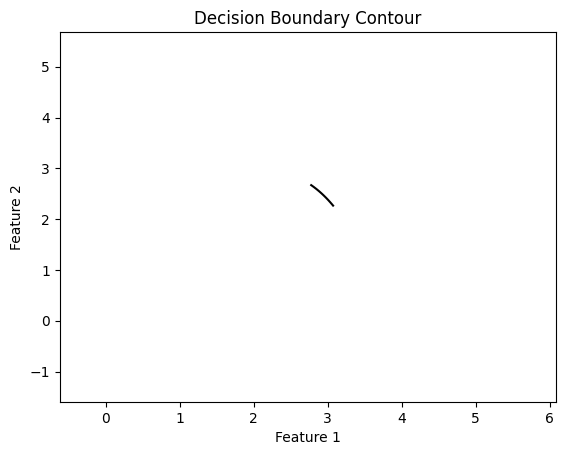

In [62]:
plot_separation_surface(X_train = X_2, y_train = y_2)

In [59]:
X_2

array([[ 1.32256503,  1.47057083],
       [ 0.78812222,  2.68194667],
       [ 1.64278804,  1.36598341],
       [ 2.68511904,  1.90821085],
       [ 2.171275  ,  2.40398982],
       [ 1.00340898,  2.69260416],
       [ 2.13854474,  1.03976287],
       [ 2.3082539 ,  1.73239901],
       [ 1.29291405,  1.62004375],
       [ 2.12298008,  1.47733661],
       [ 2.04656697,  3.41236339],
       [ 1.08562376,  2.32398537],
       [ 2.28622989,  0.99129284],
       [ 2.44862762,  2.73428956],
       [ 2.86644099,  3.69772496],
       [ 2.84304164,  2.82597221],
       [ 0.89786451,  0.78450403],
       [ 1.24973997,  1.61261274],
       [ 2.41202821,  3.01352892],
       [ 2.41102876,  1.43386443],
       [ 2.41203815,  2.35505554],
       [ 5.08218519,  2.61970724],
       [ 2.45671241,  1.25845562],
       [ 2.90845251,  1.95237972],
       [ 2.76320141, -0.59301387],
       [ 2.521113  ,  1.18048989],
       [ 1.7477846 ,  1.79794548],
       [ 2.60717538,  1.00177345],
       [ 1.38173983,